## Un peu de probabilités

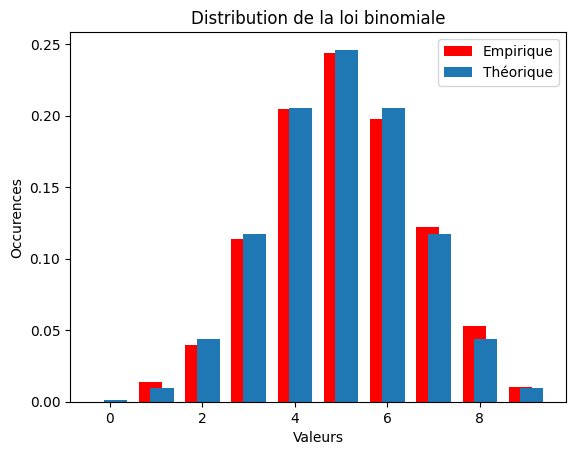

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

def binom(n, p, k):
    if k <= n and k >= 0 :
        return comb(n, k) * p**k * (1 - p)**(n - k)
    else:
        return 0
    
def echantillon(n, p, taille):
    Q = list(np.random.binomial(n, p, taille))
    return[Q.count(i) / taille for i in range(n5)]

n5 = 10
p5 = .5
taille5 = 1000
Q = echantillon(n5, p5, taille5)

width = .5

pos1 = np.arange(n5) - width / 4
pos2 = np.arange(n5) + width / 4

plt.bar(pos1, Q, width, label='Empirique', color='red')
plt.bar(pos2, [binom(n5, p5, k) for k in range(n5)], width, label='Théorique')

plt.title("Distribution de la loi binomiale")
plt.xlabel("Valeurs")
plt.ylabel("Occurences")
plt.legend()
plt.show()

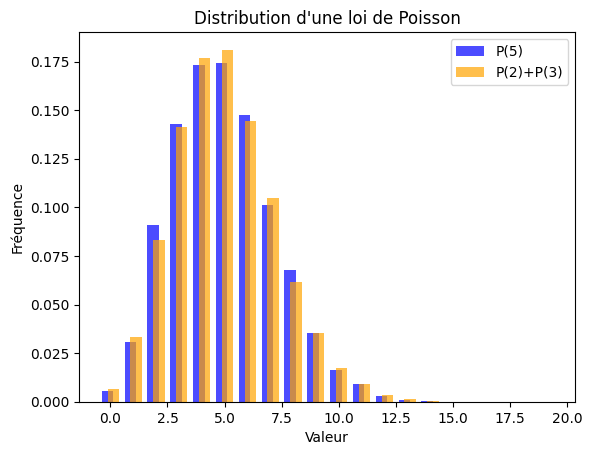

In [4]:
def frequencies(values, n_range, n_taille):
    return [np.sum(values == i) / n_taille for i in range(n_range)]

n_range = 20
n_taille = 10000
l_val = lambda x: np.random.poisson(lam=x, size=n_taille)
a, b = 2, 3

freq_a_b = frequencies(l_val(a+b), n_range, n_taille)
freq_a_plus_b = frequencies(l_val(a)+l_val(b), n_range, n_taille)

width = 0.5
pos1 = np.arange(n_range) - width/4
pos2 = np.arange(n_range) + width/4

plt.bar(pos1, freq_a_b, width=width, alpha=0.7, label="P("+str(a+b)+")", color='blue')
plt.bar(pos2, freq_a_plus_b, width=width, alpha=0.7, label="P("+str(a)+")+P("+str(b)+")", color='orange')

plt.title("Distribution d'une loi de Poisson")
plt.xlabel("Valeur")
plt.ylabel("Fréquence")
plt.legend()

## D'autres exemples plus ou moins inutiles

Les codes suivants ne sont pas expliqués. Leur étude est laissée à la discrétion du lecteur.

In [ ]:
import random
import math
import matplotlib.pyplot as plt
#import matplotlib.colors
import numpy as np
np.random.seed(19680801)

N = 20

fig, ax = plt.subplots()
dots = np.arange(N)


class Grid:
    def __init__(self, size_x, size_y):
        self.size_x, self.size_y = size_x, size_y
        self.grid = [[ random.randrange(0,N) for x in range(size_x)] for y in range(size_y)]
        
    def see(self):
        print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in self.grid]))

    def get(self):
        return self.grid
    
a = Grid(N, 1)
b = Grid(N, 1)

data = [a.get(), b.get()]

ax.scatter(*data, c=data[1])
ax.plot(a.get(), b.get())

def onclick_bt1(event):
    for it in range(N):
        if abs(round(event.xdata) - a.get()[0][it]) <= math.log(N) and abs(round(event.ydata) - b.get()[0][it]) <= math.log(N):
            print("TOUCHÉ")
    
points = list(zip(a.get(), b.get()))

def distance(a,b):
    return(sum([(k[0]-k[1])**2 for k in zip(a,b)])**0.5)

def onclick_bt2(event):
    dists = [distance([event.xdata, event.ydata],k) for k in points]
    print(sorted(dists[0])[1]) 

def get_nearest_point_distance(point):
    dists = []
    for j in range(0, len(points[0][0])):
            dists.append(distance([point[0], point[1]], [points[0][0][j], points[0][1][j]]))
    return(sorted(dists)[1]) 

for i in range(0, N): # Bête et méchant
    for j in range(0, N):
        if distance([a.get()[0][i], b.get()[0][i]], [a.get()[0][j], b.get()[0][j]]) == get_nearest_point_distance([a.get()[0][i], b.get()[0][i]]):
            plt.plot([a.get()[0][i], a.get()[0][j]], [b.get()[0][i], b.get()[0][j]])
            print("ON EN A TROUVE UN")

fig.canvas.mpl_connect('button_press_event', onclick_bt1)
fig.canvas.mpl_connect('button_press_event', onclick_bt2)

plt.show()

On obtient alors par exemple cette jolie constellation.

<center><img src="constellation.png"/></center>

Objectif: optimiser le code.

## Petit transpilateur

Concluons enfin par un petit transpilateur venant de chez [Austin Z. Henley](https://austinhenley.com/blog/teenytinycompiler1.html) auquel quelques petites modifications ont été apportées. Quiconque intéressé(e) par le fait de sauver la vie à ce petit transpilateur est fortement invité à le faire! Il faudrait éventuellement tout reprendre, et si nous le faisions dans un projet ?! Ce code est une usine à problème (fait en deux soirées). Il apparaît tout de même ci-après si jamais vous souhaitez y jeter un coup d'oeil.

Pour l'instant on peut y faire de petites choses comme y définir des fonctions

```
LET x = 0

FUNCTION(STRING) mafonction (NUMBER i, STRING s, NUMBER j) DO
    PRINT i * 2
    RETURN s
ENDFUNCTION

FUNCTION(NUMBER) mafonction2 (NUMBER l, STRING k, NUMBER m) DO
    PRINT l * 2
    RETURN l
ENDFUNCTION
```
Pour obtenir :
```c
#include <stdio.h>

char* mafonction(float i, char s[], float j);
float mafonction2(float l, char k[], float m);

int main(void) {

	float x;
	x = 0;
	return 0;
}

char* mafonction(float i, char s[], float j) {
	
	printf("%f", (float) (i*2));
	return s;
}
float mafonction2(float l, char k[], float m) {
	
	printf("%f", (float) (l*2));
	return l;
}
```
C'est effectivement très baroque. Ci-dessous, le code pour générer ledit code C. Attention, c'est mal foutu! Nous y remédierons dans quelques chapitres. Ce sera particulièrement important pour les personnes intéressées par le TAL (Traitement Automatique du Langage).

In [ ]:
# Exécuter :
# python main.py test.tiny
# gcc out.c
# a.exe

import sys
import enum

global DEBUG
DEBUG = True

class TokenType(enum.Enum):

	EOF = -1
	NEWLINE = 0
	NUMBER = 1
	IDENT = 2
	STRING = 3
	TYPE_FUNCTION = 4
	IDENT_FUNCTION = 5
	VOID = 6

	# Mots clefs
	LABEL = 101
	GOTO = 102
	PRINT = 103
	INPUT = 104
	LET = 105
	IF = 106
	THEN = 107
	ENDIF = 108
	WHILE = 109
	REPEAT = 110
	ENDWHILE = 111
	FOR = 112
	DO = 113
	ENDFOR = 114
	PRINTL = 115
	FUNCTION = 116
	ENDFUNCTION = 117
	RETURN = 118
	#VAR = 119

	# Opérateurs
	EQ = 201  
	PLUS = 202
	MINUS = 203
	ASTERISK = 204
	SLASH = 205
	EQEQ = 206
	NOTEQ = 207
	LT = 208
	LTEQ = 209
	GT = 210
	GTEQ = 211


class Token:

    def __init__(self, tokenText, tokenKind):
        
        self.text = tokenText
        self.kind = tokenKind # Type

    @staticmethod
    def checkIfKeyword(token):

        for kind in TokenType: 
            
            if kind.name == token and \
               kind.value >= 100 and \
               kind.value < 200:
               return kind

        return None

    @staticmethod
    def checkIfKnownType(token):

        return token == "NUMBER" or token == "STRING" or token == "VOID"

    def getType(self):

        return self.kind

class Lexer:

    """
        Opérateurs : +, -, *, /, =, ==, !=, >, <, >=, <=.
        Chaînes (String).
        Nombres (entiers ou décimaux).
        Identifieurs (variables).
        Mots clefs (LABEL, GOTO, PRINT, INPUT, LET, IF, THEN, ENDIF, WHILE, REPEAT, ENDWHILE).
            AJOUT : FOR ... DO ... ENDFOR
                    PRINTL
                    FUNCTION(type) name(TYPE a, TYPE b, ...) DO ... ENDFUNCTION
    """

    # @TODO : 
    #   - commentaire (ajouter \) : # sjsjsjs \
    #                                 sksbsjkbnzs
    #   - améliorer le découpage du texte (optimiser un petit peu)
    #       (pour les variables, nombres et strings)
    #   - ajouter un ELSE, ENDELSE
    #   - ajouter un SWITCH case...

    def __init__(self, input):

        self.source = input + "\n"
        self.currentChar = ""
        self.currentPos = -1
        self.nextChar()

    # Regarder le caractère suivant.
    def nextChar(self):

        self.currentPos += 1

        if self.currentPos >= len(self.source):
            self.currentChar = "\0" # End Of File
        else:
            self.currentChar = self.source[self.currentPos]

    # Regarder le caractère suivant sans modifier le pointeur.
    def peek(self):

        if self.currentPos + 1 >= len(self.source):
            return "\0"
        
        return self.source[self.currentPos + 1]
        
    def lookBack(self, idx):

        if self.currentPos - idx <= 0:
            return "\0"

        return self.source[self.currentPos - idx]

    # Token invalide trouvé, 
    # Renvoyer message d'erreur et stop.
    def abort(self, message):
        
        sys.exit("Erreur du lexer. " + message)

    # Sauter les espacements (sauf les nouvelles lignes).
    # Utilisé pour découper le code en morceaux.
    def skipWhitespace(self):
        
        while self.currentChar == " " or \
              self.currentChar == "\t" or \
              self.currentChar == "r":

              self.nextChar()

    # Sauter les commentaires.
    def skipComment(self):
        
        if self.currentChar == "#":
            while self.currentChar != "\n":
                self.nextChar()

    # Retourner le token suivant.
    # "Nourriture" du lexer.
    def getToken(self):
        
        self.skipWhitespace()
        self.skipComment()

        token = None

        # Opérateurs arithmétiques
        if self.currentChar == "+":
            token = Token("+", TokenType.PLUS)

        elif self.currentChar == "-":
            token = Token("-", TokenType.MINUS)

        elif self.currentChar == "*":
            token = Token("*", TokenType.ASTERISK)
        
        elif self.currentChar == "/":
            token = Token("/", TokenType.SLASH)

        elif self.currentChar == "\n":
            token = Token("\n", TokenType.NEWLINE)

        elif self.currentChar == "=":
            if self.peek() == "=":
                self.nextChar()
                token = Token("==", TokenType.EQEQ)
            else:
                token = Token("=", TokenType.EQ)

        elif self.currentChar == ">":
            if self.peek() == "=":
                self.nextChar()
                token = Token(">=", TokenType.GTEQ)
            else:
                token = Token(">", TokenType.GT)

        elif self.currentChar == "<":
            if self.peek() == "=":
                self.nextChar()
                token = Token("<=", TokenType.LTEQ)
            else:
                token = Token("<", TokenType.LT)

        elif self.currentChar == "!":
            if self.peek() == "=":
                self.nextChar()
                token = Token("!=", TokenType.NOTEQ)
            else:
                self.abort("Token \"!=\" attendu.")

        # String
        elif self.currentChar == "\"":
            self.nextChar()
            strBegin = self.currentPos

            while self.currentChar != "\"":
                if self.currentChar == '\r' or self.currentChar == '\n' or self.currentChar == '\t' or self.currentChar == '\\' or self.currentChar == '%':
                    self.abort("Caractère illégal dans le string : " + self.currentChar)                
                self.nextChar()

            strText = self.source[strBegin : self.currentPos]
            token = Token(strText, TokenType.STRING)

        # Nombre (entier ou à virgule)
        elif self.currentChar.isdigit(): 

            numBegin = self.currentPos

            while self.peek().isdigit():
                self.nextChar()
            if self.peek() == ".":
                self.nextChar()

                if not self.peek().isdigit():
                    self.abort("Ce caractère aurait dû être un nombre : " + self.currentChar)
                while self.peek().isdigit():
                    self.nextChar()

            numText = self.source[numBegin : self.currentPos + 1] # + 1 pour obtenir le guillemet final
            token = Token(numText, TokenType.NUMBER)

        # Identifieur et mots clefs
        elif self.currentChar.isalpha():

            keywBegin = self.currentPos

            while self.peek().isalnum():
                self.nextChar()

            alphaText = self.source[keywBegin : self.currentPos + 1]
            keyword = Token.checkIfKeyword(alphaText)

            # Identifieur
            if keyword == None:
                if self.source[self.currentPos - 4 : self.currentPos] == "LET ":
                    token = Token(alphaText, TokenType.IDENT)
                else:
                    token = Token(alphaText, TokenType.IDENT_FUNCTION)
            # MOT-CLEF
            else:
                token = Token(alphaText, keyword)

        # Parenthèses (pour fonction type + paramètres)
        elif self.currentChar == "(" or self.currentChar == ")":
            

            if self.currentChar == "(":

                typeBegin = self.currentPos

                while self.peek() != ")":
                    self.nextChar()

                typeText = self.source[typeBegin  + 1 : self.currentPos + 1]
                keyword = Token.checkIfKnownType(typeText)
                
                if " " not in typeText:
                    if keyword:
                        token = Token(typeText, TokenType.TYPE_FUNCTION)
                    #elif typeText[0 : 3] == "VAR":
                    #    print("une var : " + typeText)
                    #    token = Token(typeText, TokenType.VAR)
                    else:
                        self.abort("Le type utilisé pour la fonction n'est pas le bon.")
                else: # on a un (ou plusieurs) paramètre(s) de fonction !
                    
                    varToks = typeText.split(",")
                    for var in varToks:
                        var_tok_sep = var.split(" ")

                        typeFun = None
                        for var_tok in var_tok_sep:
                            
                            if var_tok == "NUMBER":
                                token = Token(var_tok, TokenType.NUMBER)
                                typeFun = TokenType.NUMBER
                            elif var_tok == "STRING":
                                token = Token(var_tok, TokenType.STRING)
                                typeFun = TokenType.STRING
                            elif var_tok.isalnum():
                                print("j'ai une variable : " + var_tok)
                                token = Token(var_tok, TokenType.IDENT)
                                symbols.add(var_tok)
                                param.append([var_tok, typeFun.name])
                            elif var_tok == "" or var_tok == ",":
                                pass
                            else:
                                self.abort("Mauvaise définition des paramètres de la fonction.")

                self.nextChar()

#                self.nextChar()
#                self.nextChar()
#                self.nextChar()
#
#                fctNameBegin = self.currentPos
#
#                while self.peek() != "(":
#                    self.nextChar()
#
#                fctName = self.source[fctNameBegin : self.currentPos]
#                token = Token(fctName, TokenType.IDENT_FUNCTION)
#
#                self.nextChar()
#                print(self.currentChar)

#        # Virgule dans paramètre fonctions : 
#        elif self.currentChar == ",":
#            pass
#            """ @todo
#            """
                
        # End Of File
        elif self.currentChar == "\0":
            token = Token("", TokenType.EOF)

        # Token inconnu
        else:
            self.abort("Token inconnu : " + self.currentChar)
			
        self.nextChar()
        return token

class Parser:

    """
        Vérifier que la syntaxe soit correcte.
        Prend en entrée suite de Tokens.
        Retourne un arbre syntaxique.

        Correspondence bijective entre les règles de grammaire et l'implémentation.
    """

    def __init__(self, lexer, emitter):
        
        self.lexer = lexer
        self.emitter = emitter

        global symbols
        symbols = set()
        global param
        param = []

        self.labelsDeclared = set()
        self.labelsGotoed = set()

        self.functionsDecl = set()
        self.functionCode = set()

        self.currentToken = None
        self.peekToken = None

        self.nextToken()    # Appeler deux fois pour initialiser le présent
        self.nextToken()    # et le suivant.

    # Renvoyer True si c'est le bon token.
    def checkToken(self, kind):
        
        return kind == self.currentToken.kind

    # Renvoyer True si le prochain token est le bon token.
    # Permet (avec checkToken) de savoir quelle règle syntaxique
    # doit être appliquée en fonction du présent token et du suivant.
    def checkPeek(self, kind):
        
        return kind == self.peekToken.kind

    # Attend en entrée un token spécifique sinon retourne une erreur.
    def match(self, kind):
        
        if not self.checkToken(kind):
            self.abort("Le token suivant \"" + kind.name + "\" était attendu (et non \"" + self.currentToken.kind.name + "\").")
        
        self.nextToken()

    # Passe au token suivant.
    def nextToken(self):

        self.currentToken = self.peekToken
        self.peekToken = self.lexer.getToken()

    # Arrêt du programme.
    def abort(self, message):
        
        sys.exit("Erreur lors du parsing. " + message)

    """
        Pour chaque règle de grammaire, on a une fonction.
    """

    # Nouvelle ligne
    def nl(self):

        if DEBUG: print("NEWLINE")

        self.match(TokenType.NEWLINE)

        while self.checkToken(TokenType.NEWLINE):
            self.nextToken()

    # Opérateur primaire (nombre ou identifieur)
    def primary(self, fn=False):

        if DEBUG: print("PRIMAIRE (" + self.currentToken.text + ")")
        print(self.currentToken.text + " vs " + str(symbols))
        print(self.currentToken.getType())
        if self.checkToken(TokenType.NUMBER):

            if fn: self.emitter.addFunctionDefinitionSN(self.currentToken.text)
            else: self.emitter.emit(self.currentToken.text)            
            self.nextToken()

        elif self.checkToken(TokenType.IDENT) or self.checkToken(TokenType.IDENT_FUNCTION):
            # J'ai un peu merdé et mélangé les symboles des identifieurs et ceux en paramètres de fonction, gné.

            if self.currentToken.text not in symbols:
                self.abort("Variable (" + self.currentToken.text + ") utilisée mais non déclarée")
            
            if fn: self.emitter.addFunctionDefinitionSN(self.currentToken.text)
            else: self.emitter.emit(self.currentToken.text)            
            self.nextToken()

        else:
            
            self.abort("Token non attendu : " + self.currentToken.text + ".")

    # Opérateur binaire (plus ou moins primaires)
    def unary(self, fn=False):

        if DEBUG: print("UNAIRE")

        if self.checkToken(TokenType.PLUS) or self.checkToken(TokenType.MINUS):

            if fn: self.emitter.addFunctionDefinitionSN(self.currentToken.text)
            else: self.emitter.emit(self.currentToken.text)
            self.nextToken()

        self.primary(fn=fn)

    # Opérateur arithmétique (fois ou divisé)
    def term(self, fn=False):

        if DEBUG: print("TERME")
        self.unary(fn=fn)

        while self.checkToken(TokenType.ASTERISK) or self.checkToken(TokenType.SLASH):
            
            if fn: self.emitter.addFunctionDefinitionSN(self.currentToken.text)
            else: self.emitter.emit(self.currentToken.text)
            self.nextToken()
            self.unary(fn=fn)

    # Opérateur arithmétique (plus ou moins)
    def expression(self, fn=False):

        if DEBUG: print("EXPRESSION")
        self.term(fn=fn)

        while self.checkToken(TokenType.PLUS) or self.checkToken(TokenType.MINUS):
            
            if fn: self.emitter.addFunctionDefinitionSN(self.currentToken.text)
            else: self.emitter.emit(self.currentToken.text)
            self.nextToken()
            self.term(fn=fn)

    # Est-ce un opérateur de comparaison ?
    def isComparisonOperator(self):

         return self.checkToken(TokenType.GT) or self.checkToken(TokenType.GTEQ) or self.checkToken(TokenType.LT) or self.checkToken(TokenType.LTEQ) or self.checkToken(TokenType.EQEQ) or self.checkToken(TokenType.NOTEQ)

    # Comparaison sur les opérateurs arithmétiques
    def comparison(self, fn=False):
        
        if DEBUG: print("COMPARAISON")

        self.expression(fn=fn)

        if self.isComparisonOperator():
            
            if fn: self.emitter.addFunctionDefinitionSN(" " + self.currentToken.text + " ")
            else: self.emitter.emit(" " + self.currentToken.text + " ")
            self.nextToken()
            self.expression(fn=fn)
        
        else:

            self.abort("Opérateur de comparaison attendu : " + self.currentToken.text + ".")

        while self.isComparisonOperator():
            
            if fn: self.emitter.addFunctionDefinitionSN(self.currentToken.text)
            else: self.emitter.emit(self.currentToken.text)
            self.nextToken()
            self.expression(fn=fn)

    def statement(self, function=False):
        
        # PRINT
        if self.checkToken(TokenType.PRINT):

            if DEBUG: print("STATEMENT-PRINT")
            self.nextToken()

            if self.checkToken(TokenType.STRING):

                if function: self.emitter.addFunctionDefinitionSN("\tprintf(\"" + self.currentToken.text + "\");")
                else: self.emitter.emitLine("\tprintf(\"" + self.currentToken.text + "\");")
                self.nextToken()
            else:

                if function: self.emitter.addFunctionDefinitionSN("\tprintf(\"%f\", (float) (")
                else: self.emitter.emit("\tprintf(\"%f\", (float) (")
                self.expression(fn=function)

                if function: self.emitter.addFunctionDefinition("));")
                else: self.emitter.emitLine("));")

        # PRINTL
        elif self.checkToken(TokenType.PRINTL):

            if DEBUG: print("STATEMENT-PRINTL")
            self.nextToken()

            if self.checkToken(TokenType.STRING):

                if function: self.emitter.addFunctionDefinition("\tprintf(\"" + self.currentToken.text + "\\n \");")
                else: self.emitter.emitLine("\tprintf(\"" + self.currentToken.text + "\\n \");")
                self.nextToken()
            else:
                if function: self.emitter.addFunctionDefinition("\tprintf(\"%f\\n \", (float) (")
                else: self.emitter.emit("\tprintf(\"%f\\n \", (float) (")
                self.expression(fn=function)

                if function: self.emitter.addFunctionDefinition("));")
                else: self.emitter.emitLine("));")

        # IF ... THEN ... ENDIF
        elif self.checkToken(TokenType.IF):

            if DEBUG: print("STATEMENT-IF")
            self.nextToken()
            if function: self.emitter.addFunctionDefinition("\tif(")
            else: self.emitter.emit("\tif(")
            self.comparison(fn=function)
            
            self.match(TokenType.THEN)
            self.nl()
            if function: self.emitter.addFunctionDefinition(") {")
            else: self.emitter.emitLine(") {")

            # Expression dans le STATEMENT-IF
            while not self.checkToken(TokenType.ENDIF):
                self.statement(fn=function)

            self.match(TokenType.ENDIF)
            if function: self.emitter.addFunctionDefinition("\t}")
            else: self.emitter.emitLine("\t}")

        # WHILE ... REPEAT ... ENDWHILE
        elif self.checkToken(TokenType.WHILE):

            if DEBUG: print("STATEMENT-WHILE")
            self.nextToken()
            if function: self.emitter.addFunctionDefinition("\twhile(")
            else: self.emitter.emit("\twhile(")
            self.comparison(fn=function)

            self.match(TokenType.REPEAT)
            self.nl()
            if function: self.emitter.addFunctionDefinition(") {")
            else: self.emitter.emitLine(") {")

            # Expression dans le STATEMENT-WHILE
            while not self.checkToken(TokenType.ENDWHILE):
                self.statement(fn=function)

            self.match(TokenType.ENDWHILE)
            if function: self.emitter.addFunctionDefinition("\t}")
            else: self.emitter.emitLine("\t}")

        # FOR ... DO ... ENDFOR
        elif self.checkToken(TokenType.FOR):

            if DEBUG: print("STATEMENT-FOR")
            self.nextToken()

            varTok = self.currentToken.text

            if function: self.emitter.addFunctionDefinition("\tfor(" + varTok + "; ")
            else: self.emitter.emit("\tfor(" + varTok + "; ")
            self.comparison(fn=function)
            if function: self.emitter.addFunctionDefinition("; ++" + varTok)
            else: self.emitter.emit("; ++" + varTok)
            
            self.match(TokenType.DO)
            self.nl()
            if function: self.emitter.addFunctionDefinition(") {")
            else: self.emitter.emitLine(") {")

            while not self.checkToken(TokenType.ENDFOR):
                if function: self.emitter.addFunctionDefinition("\t")
                else: self.emitter.emit("\t")
                self.statement(fn=function)

            self.match(TokenType.ENDFOR)
            if function: self.emitter.addFunctionDefinition("\t}")
            else: self.emitter.emitLine("\t}")

        # LABEL
        elif self.checkToken(TokenType.LABEL):
            
            if DEBUG: print("STATEMENT-LABEL")
            self.nextToken()

            # Vérifier que le label n'existe pas déjà
            if self.currentToken.text in self.labelsDeclared:
                self.abort("Le label \"" + self.currentToken.text + "\" existe déjà.")
            
            self.labelsDeclared.add(self.currentToken.text)

            if function: self.emitter.addFunctionDefinition("\t" + self.currentToken.text + ":") 
            else: self.emitter.emitLine("\t" + self.currentToken.text + ":")  # pourquoi ":" ?
            self.match(TokenType.IDENT)

        # GOTO
        elif self.checkToken(TokenType.GOTO):

            if DEBUG: print("STATEMENT-GOTO")
            self.nextToken()

            # Pas besoin de vérifier si le label goto existe déjà.
            self.labelsGotoed.add(self.currentToken.text)
            if function: self.emitter.addFunctionDefinition("\tgoto " + self.currentToken.text + ";")
            else: self.emitter.emitLine("\tgoto " + self.currentToken.text + ";")
            self.match(TokenType.IDENT)

        # LET ... = ...
        elif self.checkToken(TokenType.LET):

            if DEBUG: print("STATEMENT-LET")
            self.nextToken()
        
            if self.currentToken.text not in symbols:
                symbols.add(self.currentToken.text)
                if function: self.emitter.addFunctionDefinition("\tfloat " + self.currentToken.text + ";")
                else: self.emitter.emitLine("\tfloat " + self.currentToken.text + ";")
            
            if function: self.emitter.addFunctionDefinition("\t" + self.currentToken.text + " = ")
            else: self.emitter.emit("\t" + self.currentToken.text + " = ")
            self.match(TokenType.IDENT)
            self.match(TokenType.EQ)
            self.expression(fn=function)
            if function : self.emitter.addFunctionDefinition(";")
            else: self.emitter.emitLine(";")

        # VAR ...
#        elif self.checkToken(TokenType.VAR):
#            
#            print("je vois une VAR")
#            if DEBUG: print("STATEMENT-VAR")
#            self.nextToken()

            # Faire gaffe à ce que le nom d'une VARiable n'interfère pas avec celle d'un LET

#            if functionType == TokenType.NUMBER:
#                self.emitter.emit("float " + self.currentToken.text)
#            elif functionType == TokenType.STRING:
#                self.emitter.emit("char[] " + self.currentToken.text)
#            print("bonjour")
#            self.match(TokenType.IDENT)

        # INPUT
        elif self.checkToken(TokenType.INPUT):

            if DEBUG: print("STATEMENT-INPUT")
            self.nextToken()

            if self.currentToken.text not in symbols:
                symbols.add(self.currentToken.text)
                # if function ?
                self.emitter.headerLine("\tfloat " + self.currentToken.text + ";")      # SANS DOUTE QUE CE n'est pas un headerLine

            if function:
                self.emitter.addFunctionDefinition("\tif(0 == scanf(\"%" + "f\", &" + self.currentToken.text + ")) {")
                self.emitter.addFunctionDefinition("\t" + self.currentToken.text + " = 0;")
                self.emitter.addFunctionDefinitionSN("\tscanf(\"%")
                self.emitter.addFunctionDefinition("*s\");")
                self.emitter.addFunctionDefinition("\t}")      
            else: 
                self.emitter.emitLine("\tif(0 == scanf(\"%" + "f\", &" + self.currentToken.text + ")) {")
                self.emitter.emitLine("\t" + self.currentToken.text + " = 0;")
                self.emitter.emit("\tscanf(\"%")
                self.emitter.emitLine("*s\");")
                self.emitter.emitLine("\t}")
            self.match(TokenType.IDENT)

        # FUNCTION(type) name (TYPE a, TYPE b, ...) DO ... ENDFUNCTION
        elif self.checkToken(TokenType.FUNCTION):

            """
                // Prototype
                TYPE ma_fonction(TYPE a, TYPE b, ...);

                ...

                // Definition
                TYPE ma_fonction(TYPE a, TYPE b, ...) {

                    ...
                    return X;
                }
            """

            if DEBUG: print("STATEMENT-FUNCTION")
            self.nextToken()

            if self.currentToken.text in self.functionsDecl:
                self.abort("La fonction \"" + self.currentToken.text + "\" existe déjà.")
            
            if self.currentToken.text == "VOID":
                functionType = "void"
            elif self.currentToken.text == "NUMBER":
                functionType = "float"
            elif self.currentToken.text == "STRING":
                functionType = "char*"


            self.nextToken()
            functionName = self.currentToken.text
            self.functionsDecl.add(functionName)
            
            self.nextToken()       
            # Ajout des symboles fait salement (avec global)
            args = ""
            print("ici bonjoru"  + str(param))
            for p in param:
                arg = None
                if str(p[1]) == "VOID":
                    arg = "void" + " " + str(p[0])
                elif str(p[1]) == "NUMBER":
                    arg = "float" + " " + str(p[0])
                elif str(p[1]) == "STRING":
                    arg = "char" + " " + str(p[0]) + "[]"

                if p != param[-1]:                   
                    args += arg + ", "
                else:
                    args += arg

            self.emitter.addPrototype(functionType + " " + functionName + "(" + args + ");")

            self.nextToken()
            print("IIIICICII 2 : " + self.currentToken.text)
            
            #if self.currentToken.text not in self.symbols:
            #    self.symbols.add(self.currentToken.text)


            print("IIIIN : " + self.currentToken.text)

            # récupérer le current token
            # split avec les virgules
            # regarder pour chaque : faire un for
            #if self.currentToken.text == "NUMBER":
            #    pass
            #elif self.currentToken.text == "STRING":
            #    pass
            #if self.currentToken.text[0 : 3] == "VAR":
#
#                varToks = self.currentToken.text # eg. "VAR i, VAR j"
#                vars = varToks.split(",")
#                
#                for var in vars:
#                    self.emitter.emit("")
#                
#                print("mon token : " + self.currentToken.text)
#                self.nextToken()
#                print(self.currentToken.text)

            #else:
            #    self.abort("La fonction \"" + self.currentToken.text + "\" est mal définie (type).")

            print(self.currentToken.text)
            self.match(TokenType.DO)
            self.nl()

            self.emitter.addFunctionDefinition(functionType + " " + functionName + "(" + args + ") {")

            while not self.checkToken(TokenType.ENDFUNCTION):
                
                self.emitter.addFunctionDefinition("\t")
                self.statement(function=True)
                
                if self.currentToken.text == "RETURN":
                    
                    self.nextToken()
                    if self.checkToken(TokenType.NUMBER) or self.checkToken(TokenType.STRING) or self.checkToken(TokenType.IDENT) \
                        or self.checkToken(TokenType.IDENT_FUNCTION):
                        self.emitter.addFunctionDefinition("\treturn " + self.currentToken.text + ";")

                    self.nextToken()
                    self.nextToken()
            print("out")    

            self.match(TokenType.ENDFUNCTION)
            param.clear()

            self.emitter.addFunctionDefinition("}")

        else:

            tmpGetError = self.lexer.source[0 : self.lexer.currentPos]
            self.abort("Expression invalide : " + self.currentToken.text + " (" + self.currentToken.kind.name + "; ligne " + str(tmpGetError.count("\n")) + ").")
        
        self.nl()

    def start(self):
        
        self.emitter.headerLine("#include <stdio.h>")
        self.emitter.headerLine("")

        for function in self.functionsDecl:
            self.emitter.addPrototype(function)

        self.emitter.emitLine("")
        self.emitter.emitLine("int main(void) {")
        self.emitter.emitLine("")
        
        while self.checkToken(TokenType.NEWLINE):
            self.nextToken()

        while not self.checkToken(TokenType.EOF):
            self.statement()

        self.emitter.emitLine("\treturn 0;")
        self.emitter.emitLine("}")
        self.emitter.emitLine("")

        for function in self.functionCode:
            self.emitter.addFunctionCode(function)
        
        for label in self.labelsGotoed:
            if label not in self.labelsDeclared:
                self.abort("Le label (GOTO) : " + label + " n'a pas été déclaré.")

class Emitter:
    
    """
        Ne sert qu'à des manipulations de String.
        Plus une interface pour se simplifier la vie qu'autre chose.
    """

    def __init__(self, fullPath):
        self.fullPath = fullPath

        self.header = ""
        self.function_prototype = ""
        self.code = ""
        self.function_code = ""

    def emit(self, code):
        self.code += code

    def emitLine(self, code):
        self.code += code + "\n"

    def headerLine(self, code):
        self.header += code + "\n"

    def addPrototype(self, code):
        self.function_prototype += code + "\n"

    def addFunctionDefinitionSN(self, code):
        self.function_code += code

    def addFunctionDefinition(self, code):
        self.function_code += code + "\n"

    def writeFile(self):
        with open(self.fullPath, "w") as outputFile:
            outputFile.write(self.header + self.function_prototype + self.code + self.function_code)

def main():

    PATH = "" # votre chemin d'accès vers le fichier .tiny, à remplir avant d'appeler la fonction main()

    if len(sys.argv) != 2:
        sys.exit("Erreur: TinyComp 1 a besoin d'un fichier à compiler.")
    
    with open(sys.argv[1], 'r') as input_file:

        input = input_file.read()
    
        lexer = Lexer(input)
        emitter = Emitter("out.c")
        parser = Parser(lexer, emitter)

        parser.start()
        emitter.writeFile()